In [1]:
import numpy as np
import math
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
x, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

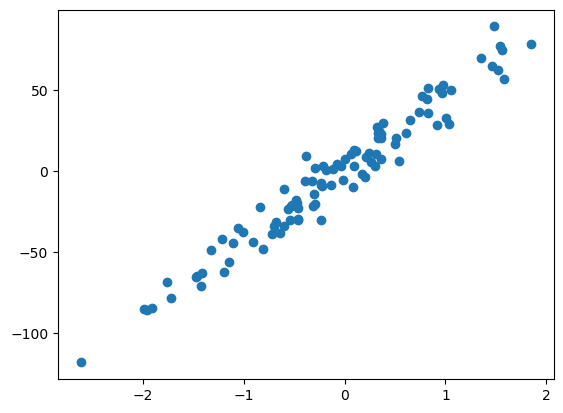

In [3]:
plt.plot(x, y, 'o', label='Data points')

In [4]:
class LinearRegression:
    def __init__(self, lr: float = 0.01, n_iters: int = 1) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.random.rand(num_features)
        self.bias = 0

        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/ num_samples) * np.dot(X.T, y_pred - y)
            db = (1/ num_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

        return self


    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



In [5]:
x, y = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

reg = LinearRegression()

reg.fit(x, y)
y_pred = reg.predict(x)


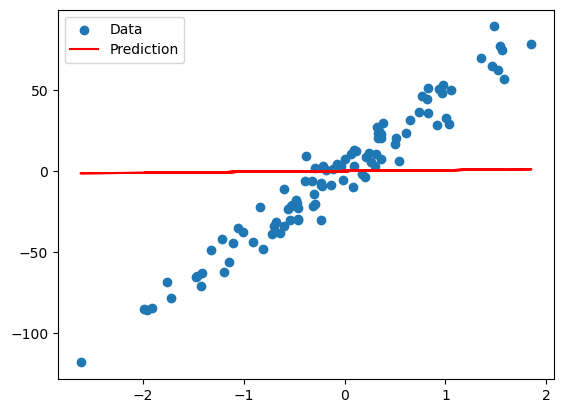

In [6]:
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Prediction')
plt.legend()
plt.show()

In [7]:
print(y_pred)

[ 0.47529475  0.01332656 -0.61309027  0.13765158 -0.29651234  0.32011214
 -0.28789028  0.26258535  0.30040607  0.51483181  0.41544282  0.80731467
  0.3697863  -0.15451146 -0.4767174   0.01590592 -1.10664648  0.2465563
  0.52986167 -1.46784253  0.23749827  0.01881528 -0.28915545  0.46660624
  0.82187419  0.76770373 -0.36297824 -0.05391017 -0.36356261 -0.68887575
  0.16110764  0.17127768  0.10854464 -0.32419321 -0.53118094  0.07341737
 -0.19792419  0.16358289  0.41579435 -0.19392215  0.16345134 -0.40472082
  0.79910292 -0.31790584 -0.1624358  -0.24886938 -0.19907132 -0.38731849
  0.14558812  0.07998512 -0.21360423 -0.03150789 -0.16242681  0.7744044
 -0.24502479  0.15372351  0.14696287 -0.13589944 -0.16267315 -1.12191282
  0.14303424 -0.15785182 -0.63969757 -0.41847267 -0.83514809  0.49574098
 -0.97818895 -1.08126172 -0.34199231  0.38563781  0.41031186 -0.80712506
 -0.84336001 -0.70235724 -0.49352967  0.8298465   0.49951677  0.09809687
  0.12773238 -0.33219472 -0.99904966  0.02639135  0.0

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_regression

In [9]:
x, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=12)
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float().view(-1,1)

In [10]:
model = nn. Linear(1,1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [11]:
for epoch in range(1000):
    y_pred = model(x)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1)%100 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')



Epoch 100, Loss: 117.8744
Epoch 200, Loss: 100.1889
Epoch 300, Loss: 99.8863
Epoch 400, Loss: 99.8795
Epoch 500, Loss: 99.8794
Epoch 600, Loss: 99.8794
Epoch 700, Loss: 99.8794
Epoch 800, Loss: 99.8794
Epoch 900, Loss: 99.8794
Epoch 1000, Loss: 99.8794


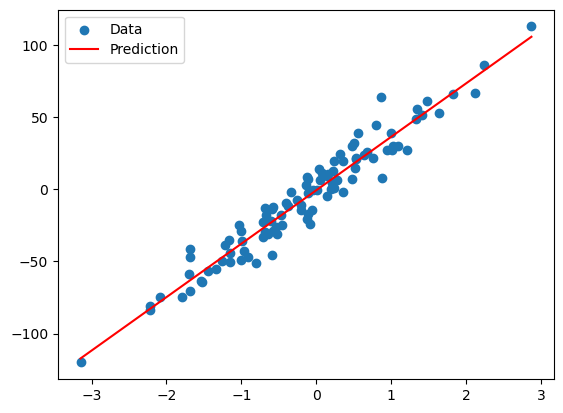

In [12]:
# Plot
with torch.no_grad():
    y_pred = model(x)

sorted_idx = x[:,0].argsort()
plt.scatter(x, y, label='Data')
plt.plot(x[sorted_idx], y_pred[sorted_idx], color='red', label='Prediction')
plt.legend()
plt.show()